<a href="https://colab.research.google.com/github/beabritw/ProjetoIntegradorest/blob/main/C%C3%B3pia_de_ProjetoIntegrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Configurações de usuário e repositório Git
from getpass import getpass

# Token de Acesso Pessoal (PAT) do GitHub
token = getpass('GitHub Token: ')

# Nome de usuário do GitHub
username = "beabritw"

# Nome do repositório GitHub
repo_name = "projetointegradorest"

# Nome da branch (pode ser 'main' ou outra branch específica)
branch_name = "main"

# Clonando o repositório do GitHub
!git clone https://{token}@github.com/{username}/{repo_name}.git
%cd {repo_name}

# Configurando informações de usuário no Git
!git config --global user.email "biaabrito88@gmail.com"
!git config --global user.name "beabritw"


GitHub Token: ··········
Cloning into 'projetointegradorest'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 366.84 KiB | 2.91 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/projetointegradorest


In [33]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image
import os

class SkinColorDetector:
    def __init__(self):
        self.tabela_cores = {
            "extremamente_clara": ["#FFF5EB", "#FFEDDA", "#FFE7CB", "#FFDFBB", "#FFD7AB"],
            "clara": ["#FFCDA0", "#FFC18F", "#FFB57F", "#EACBA8"],
            "morena_clara": ["#DEB887", "#D2B48C", "#BC8F8F"],
            "media": ["#AC8B64", "#CF9E7C", "#b37e66"],
            "morena_escura": ["#A0522D", "#94613C", "#AE703A"],
            "escura": ["#8B4513", "#B26A49", "#a05f41"],
            "muito_escura": ["#994D44", "#623A18", "#503431", "#7a3d36"],
            "negra": ["#000000", "#3F281B", "#3d1e1b"],
        }
        self.links_produtos_pele = {
            "extremamente_clara": ["https://www.boticario.com.br/base-liquida-cor-100-make-b-mate-salicylic-30g/",
                                   "https://www.belezanaweb.com.br/maybelline-superstay-active-wear-30h-110-porcelain-base-liquida-30ml/",
                                   "https://www.boticario.com.br/base-liquida-cor-120-make-b-mate-salicylic-30g/"],

            "clara": ["https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151440965851",
                      "https://www.eudora.com.br/base-liquida-glam-skin-control-cor-45-30ml/?gad_source=1&gclid=CjwKCAjwgpCzBhBhEiwAOSQWQdfgulfK8YvSJCTZnOeanuMhOy1n837ARV15ld2x_wYAotTfx6Qe_RoCEoIQAvD_BwE&gclsrc=aw.ds",
                      "https://www.boticario.com.br/base-liquida-cor-170-make-b-mate-salicylic-30g/"],

            "morena_clara": ["https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441064155",
                             "https://www.boticario.com.br/base-liquida-cor-210-make-b-mate-salicylic-30g/",
                             "https://www.belezanaweb.com.br/vult-nano-hd-cor-v230-base-liquida-26ml/"],

            "media": ["https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441195227",
                      "https://www.belezanaweb.com.br/vult-nano-hd-cor-v260-base-liquida-26ml/",
                      "https://www.boticario.com.br/base-liquida-cor-260-make-b-mate-salicylic-30g/"],

            "morena_escura": ["https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441359067",
                              "https://www.boticario.com.br/base-liquida-make-b-glycolic-tx-cor-270-30g/",
                              "https://www.belezanaweb.com.br/divspan-stylecolor-inherit-fontfamily-inherit-fontsize-15remvult-nano-hd-cor-v280-base-liquida-26mlspandiv/"],

            "escura": ["https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441457371",
                       "https://www.boticario.com.br/base-liquida-cor-310-make-b-mate-salicylic-30g/"],

            "muito_escura": ["https://www.belezanaweb.com.br/vult-nano-hd-cor-v350-base-liquida-26ml/",
                             "https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441588443",
                             "https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441621211"],

            "negra": ["https://www.boticario.com.br/base-liquida-cor-330-make-b-mate-salicylic-30g/",
                      "https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441653979",
                      "https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441785051"]
        }


    #Calcula a diferença entre duas cores hexadecimais.
    def diferenca_cor(self, cor1, cor2):
        r1, g1, b1 = int(cor1[1:3], 16), int(cor1[3:5], 16), int(cor1[5:], 16)
        r2, g2, b2 = int(cor2[1:3], 16), int(cor2[3:5], 16), int(cor2[5:], 16)
        return ((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2) ** 0.5

    #Encontra a categoria de cor de pele mais próxima de um valor hexadecimal.
    def tabela(self, cor_Hex):
        cor_mais_proxima = None
        menor_diferenca = float('inf')
        tipo_cor = None

        for categoria, cores in self.tabela_cores.items():
            for cor in cores:
                diferenca = self.diferenca_cor(cor_Hex, cor)
                if diferenca < menor_diferenca:
                    cor_mais_proxima = cor
                    menor_diferenca = diferenca
                    tipo_cor = categoria

        return tipo_cor if tipo_cor else cor_mais_proxima

    #Detecta a cor da pele em uma imagem e retorna a cor média e o link do produto.
    def detectar_cor_pele(self, imagem_path):
        image = self.carregar_imagem(imagem_path)
        faces = self.detectar_faces(image)
        mean_skin_colors = self.calcular_cores_medias(image, faces)
        self.desenhar_retangulos(image, faces)
        mean_color = mean_skin_colors[0]
        mean_color_hex = self.rgb_para_hex(mean_color)
        tipo_cor_pele = self.tabela(mean_color_hex)

        # Salvar imagens na pasta correspondente
        self.criar_pasta(tipo_cor_pele)
        self.salvar_imagem(image, f'{tipo_cor_pele}/output_segmented.jpg')
        mean_skin_colors_image = self.criar_imagem_cores_medias(mean_skin_colors)
        self.salvar_imagem(mean_skin_colors_image, f'{tipo_cor_pele}/mean_skin_colors.jpg')
        self.salvar_texto(mean_color_hex, f'{tipo_cor_pele}/mean_color_hex.txt')

        link_produto_pele = self.links_produtos_pele.get(tipo_cor_pele)

        return mean_color_hex, tipo_cor_pele, link_produto_pele



    #Carrega uma imagem do caminho especificado.
    def carregar_imagem(self, imagem_path):
        return cv2.imread(imagem_path)

    #Detecta rostos em uma imagem.
    def detectar_faces(self, image):
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        return faces

    #Calcula a cor média da pele para cada rosto detectado.
    def calcular_cores_medias(self, image, faces):
        mean_skin_colors = []
        for (x, y, w, h) in faces:
            face_roi = image[y:y+h, x:x+w]
            mean_color = cv2.mean(face_roi)[:3]
            mean_skin_colors.append(mean_color)
        return mean_skin_colors

    #Desenha retângulos ao redor dos rostos detectados.
    def desenhar_retangulos(self, image, faces):
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 2)

    #Salva uma imagem no caminho especificado.
    def salvar_imagem(self, image, path):
        cv2.imwrite(path, image)

    #Cria uma imagem com as cores médias da pele.
    def criar_imagem_cores_medias(self, mean_skin_colors):
        height = len(mean_skin_colors) * 50
        mean_skin_colors_image = np.zeros((height, 200, 3), dtype=np.uint8)
        for i, color in enumerate(mean_skin_colors):
            mean_skin_colors_image[i*50:i*50+50, :] = color
        return mean_skin_colors_image

    #Converte uma cor RGB para hexadecimal.
    def rgb_para_hex(self, rgb):
        return '#{:02x}{:02x}{:02x}'.format(int(rgb[2]), int(rgb[1]), int(rgb[0]))

    #Faz upload da imagem para o Colab.
    def upload_image(self):
        uploaded = files.upload()
        for filename in uploaded.keys():
            return filename

    def criar_pasta(self, tipo_cor):
        if not os.path.exists(tipo_cor):
            os.makedirs(tipo_cor)

    def salvar_texto(self, texto, path):
        with open(path, 'w') as file:
            file.write(texto)


    def upload_image(self):
        uploaded = files.upload()
        for filename in uploaded.keys():
            return filename

    #Exibe uma imagem no notebook.
    def exibir_imagem(self, imagem_path):
        return Image(imagem_path)

# Uso da classe
detector = SkinColorDetector()


In [35]:
# Faz upload da imagem para o Colab
imagem_path = detector.upload_image()

# Detecta a cor da pele e obtém o link do produto
mean_color_hex, tipo_cor_pele, link_produto_pele = detector.detectar_cor_pele(imagem_path)

Saving 11126501.jpg to 11126501.jpg


In [36]:
# Imprime a média das cores da pele em formato hexadecimal
print("Média das cores da pele em Hexadecimal:", mean_color_hex)

Média das cores da pele em Hexadecimal: #ca9d8f


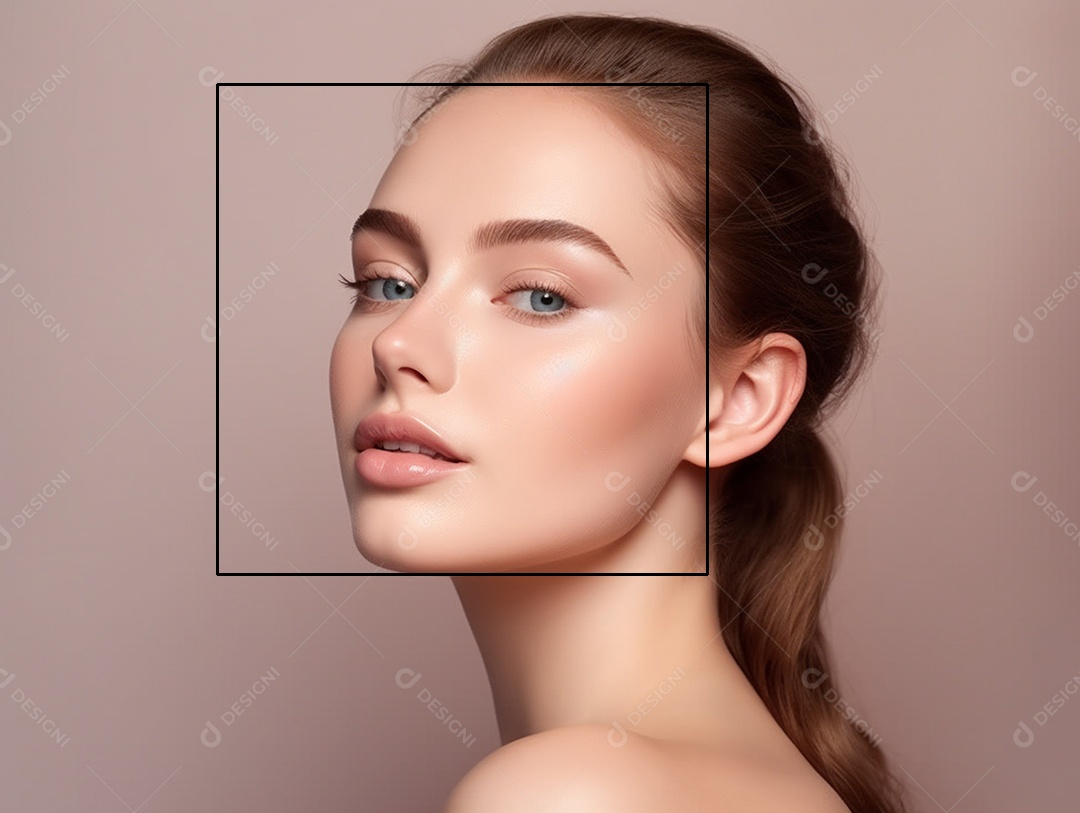

In [37]:
# Exibe a imagem com os rostos detectados
detector.exibir_imagem(f'{tipo_cor_pele}/output_segmented.jpg')

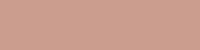

In [39]:
# Exibe a imagem com as cores médias da pele
detector.exibir_imagem(f'{tipo_cor_pele}/mean_skin_colors.jpg')

In [38]:
print("Tipo da cor de pele:", tipo_cor_pele)

Tipo da cor de pele: media


In [40]:
# Imprime o link do produto correspondente ao tipo de pele, se disponível
if link_produto_pele:
    print("Link do produto para este tipo de pele:", link_produto_pele)
else:
    print("Não há link de produto para este tipo de pele.")

Link do produto para este tipo de pele: ['https://contem1g.com.br/products/base-velvet-segunda-pele?variant=44151441195227', 'https://www.belezanaweb.com.br/vult-nano-hd-cor-v260-base-liquida-26ml/', 'https://www.boticario.com.br/base-liquida-cor-260-make-b-mate-salicylic-30g/']
